# WeatherPy
----

### What's the weather like as we approach the equator?

As we expected (and the data confirms), it gets hotter... The dataset created is for 500+ cities around the world ramdomly choosen to evaluate the Max Temperature, Humidity, Cloudiness and Wind Speed.

**Findings and observations:**

- Temperature vs. Latitude: this plot shows that the closer the latitude is to 0°, the higer is the temprature.
- Humidity vs. Latitude: it is not a clear correlation but near latitude -20° and latitude 20° the humidity its a little less than the rest of latitudes.
- Cloudiness vs. Latitude: For this day in the year we can see that between latitude -20° and 0° there is almost 100% of cloudiness and 0% between 0° and 20°.
- Wind Speed vs Latitude: there is not visible correlation in this day (more data is required in another seasons.)
- Northen and Southern Hemispheres has very similar behaviors



In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Initializing Endpoint
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

params = {
    'appid' : weather_api_key,
    'units': 'imperial',
    'q' : 'portobelo'
}

endpoint = f"{url}units={units}&appid={weather_api_key}&q="

In [5]:
# Get a response to proof our endpoint and lok up json format
# response = requests.get(endpoint + "mataura").json()
response = requests.get(url, params=params).json()
response

{'coord': {'lon': -79.65, 'lat': 9.55},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 77.09,
  'feels_like': 79.95,
  'temp_min': 75,
  'temp_max': 79,
  'pressure': 1024,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 8.52, 'deg': 68, 'gust': 11.72},
 'clouds': {'all': 86},
 'dt': 1616048048,
 'sys': {'type': 3,
  'id': 2038124,
  'country': 'PA',
  'sunrise': 1616066624,
  'sunset': 1616110165},
 'timezone': -18000,
 'id': 3702577,
 'name': 'Portobelo',
 'cod': 200}

In [6]:
cities_df = pd.DataFrame({'City':cities})
cities_df.shape

(599, 1)

In [7]:
# Initializing the Data Frame
cities_df['Cloudiness'] = ''
cities_df['Country']    = ''
cities_df['Date']       = ''
cities_df['Humidity']   = ''
cities_df['Lat']        = ''
cities_df['Lng']        = ''
cities_df['MaxTemp']    = ''
cities_df['WindSpeed']  = ''
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,albany,,,,,,,,
1,pevek,,,,,,,,
2,kuche,,,,,,,,
3,zhigansk,,,,,,,,
4,barrow,,,,,,,,


In [8]:
# Print log of each city as it'sbeing processed (with the city number and city name)
# Initializing
city_data = []
not_found = []

print('Obtaining data... ')

# use iterrows to iterate through pandas dataframe
for i, row in cities_df.iterrows():

    # get city from "city_df" data frame
    params['q'] = {row['City']}
    
    print(f"Processing Record {i} of {len(cities_df)} | {row['City']}")

    try:
        response = requests.get(url, params = params).json()
        city_data.append(response)
        cities_df.loc[i, 'Cloudiness'] = city_data[i]['clouds']['all']
        cities_df.loc[i, 'Country']    = city_data[i]['sys']['country']
        cities_df.loc[i, 'Date']       = city_data[i]['dt']
        cities_df.loc[i, 'Humidity']   = city_data[i]['main']['humidity']
        cities_df.loc[i, 'Lat']        = city_data[i]['coord']['lat']
        cities_df.loc[i, 'Lng']        = city_data[i]['coord']['lon']
        cities_df.loc[i, 'MaxTemp']    = city_data[i]['main']['temp_max']
        cities_df.loc[i, 'WindSpeed']  = city_data[i]['wind']['speed']
        
    except:
        print("City not found. Skipping...")
        not_found.append(i)
        pass
        
print("End of Procesing...")
cities_df = cities_df.drop(cities_df.index[not_found])
    

Obtaining data... 
Processing Record 0 of 599 | albany
Processing Record 1 of 599 | pevek
Processing Record 2 of 599 | kuche
City not found. Skipping...
Processing Record 3 of 599 | zhigansk
Processing Record 4 of 599 | barrow
Processing Record 5 of 599 | tiksi
Processing Record 6 of 599 | punta arenas
Processing Record 7 of 599 | east london
Processing Record 8 of 599 | palabuhanratu
City not found. Skipping...
Processing Record 9 of 599 | maues
Processing Record 10 of 599 | butaritari
Processing Record 11 of 599 | rio gallegos
Processing Record 12 of 599 | rikitea
Processing Record 13 of 599 | mataura
Processing Record 14 of 599 | marawi
Processing Record 15 of 599 | moron
Processing Record 16 of 599 | arraial do cabo
Processing Record 17 of 599 | mar del plata
Processing Record 18 of 599 | arman
Processing Record 19 of 599 | bubaque
Processing Record 20 of 599 | port-gentil
Processing Record 21 of 599 | snezhnogorsk
Processing Record 22 of 599 | belushya guba
City not found. Skippin

Processing Record 191 of 599 | jamestown
Processing Record 192 of 599 | malatya
Processing Record 193 of 599 | severo-kurilsk
Processing Record 194 of 599 | mafra
Processing Record 195 of 599 | ko samui
Processing Record 196 of 599 | bardiyah
Processing Record 197 of 599 | mehamn
Processing Record 198 of 599 | saleaula
City not found. Skipping...
Processing Record 199 of 599 | faanui
Processing Record 200 of 599 | tura
Processing Record 201 of 599 | owando
Processing Record 202 of 599 | jawhar
Processing Record 203 of 599 | fort nelson
Processing Record 204 of 599 | bambanglipuro
Processing Record 205 of 599 | kavieng
Processing Record 206 of 599 | coihaique
Processing Record 207 of 599 | gallipoli
Processing Record 208 of 599 | berlevag
Processing Record 209 of 599 | churapcha
Processing Record 210 of 599 | itigi
Processing Record 211 of 599 | hobyo
Processing Record 212 of 599 | yar-sale
Processing Record 213 of 599 | singaraja
Processing Record 214 of 599 | iwaki
Processing Record 2

City not found. Skipping...
Processing Record 384 of 599 | vostok
Processing Record 385 of 599 | fortuna
Processing Record 386 of 599 | baykit
Processing Record 387 of 599 | sao gabriel da cachoeira
Processing Record 388 of 599 | virginia beach
Processing Record 389 of 599 | chimoio
Processing Record 390 of 599 | kaset sombun
Processing Record 391 of 599 | moindou
Processing Record 392 of 599 | acari
Processing Record 393 of 599 | ouadda
Processing Record 394 of 599 | tamsweg
Processing Record 395 of 599 | whitehorse
Processing Record 396 of 599 | ancud
Processing Record 397 of 599 | manokwari
Processing Record 398 of 599 | viedma
Processing Record 399 of 599 | waingapu
Processing Record 400 of 599 | saint george
Processing Record 401 of 599 | shahrud
Processing Record 402 of 599 | parga
Processing Record 403 of 599 | solsvik
City not found. Skipping...
Processing Record 404 of 599 | aswan
Processing Record 405 of 599 | drovyanaya
Processing Record 406 of 599 | rocha
Processing Record 

City not found. Skipping...
Processing Record 579 of 599 | ruwi
Processing Record 580 of 599 | humaita
Processing Record 581 of 599 | mims
Processing Record 582 of 599 | nhulunbuy
Processing Record 583 of 599 | the pas
Processing Record 584 of 599 | longford
Processing Record 585 of 599 | novyy yarychiv
Processing Record 586 of 599 | port macquarie
Processing Record 587 of 599 | nguru
Processing Record 588 of 599 | arcata
Processing Record 589 of 599 | la palma
Processing Record 590 of 599 | san quintin
Processing Record 591 of 599 | lukovetskiy
Processing Record 592 of 599 | bonthe
Processing Record 593 of 599 | cuicatlan
Processing Record 594 of 599 | dudinka
Processing Record 595 of 599 | bone
Processing Record 596 of 599 | calvinia
Processing Record 597 of 599 | ialibu
Processing Record 598 of 599 | gunjur
End of Procesing...


In [9]:
cities_df = cities_df.reset_index(drop = True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Export the city data into a .csv.
cities_df.to_csv(output_data_file, index_label = "City_ID") 

In [11]:
# Display the Data Frame
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,albany,95,US,1616048042,74,42.6001,-73.9662,34,3.83
1,pevek,41,RU,1616048049,97,69.7008,170.313,-21.82,5.17
2,zhigansk,58,RU,1616048050,85,66.7697,123.371,-16.06,11.54
3,barrow,75,US,1616047805,77,71.2906,-156.789,-4,11.5
4,tiksi,75,RU,1616048051,82,71.6872,128.869,-27.42,6.87
...,...,...,...,...,...,...,...,...,...
546,dudinka,61,RU,1616048296,87,69.4058,86.1778,-21.15,10.11
547,bone,100,DE,1616048297,96,51.9669,12.1396,30,3.83
548,calvinia,0,ZA,1616048297,63,-31.4707,19.776,59,5.75
549,ialibu,72,PG,1616048298,97,-6.2821,143.994,59.13,2.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [12]:
cities_df['Lat']        = pd.to_numeric(cities_df.Lat)
cities_df['MaxTemp']    = pd.to_numeric(cities_df.MaxTemp)
cities_df['Humidity']   = pd.to_numeric(cities_df.Humidity)
cities_df['Cloudiness'] = pd.to_numeric(cities_df.Cloudiness)
cities_df['WindSpeed']  = pd.to_numeric(cities_df.WindSpeed)

In [13]:
# Data to made plots
date = time.strftime('%d/%m/%y')

lat = cities_df['Lat']
tem = cities_df['MaxTemp']
hum = cities_df['Humidity']
clo = cities_df['Cloudiness']
wsd = cities_df['WindSpeed']


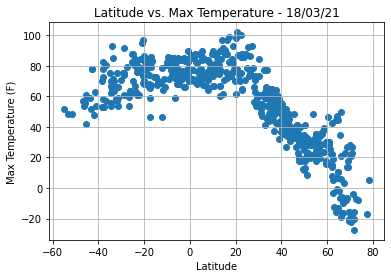

In [15]:
plt.scatter(lat, tem)
plt.title(f"Latitude vs. Max Temperature - {date}")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save plot
plt.savefig("output_data/Max_Temperature_vs_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

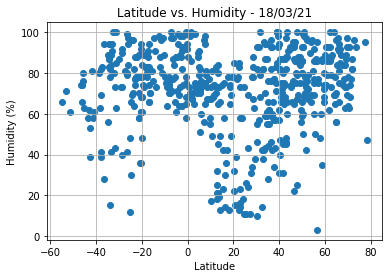

In [16]:
plt.scatter(lat, hum)
plt.title(f"Latitude vs. Humidity - {date}")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save plot
plt.savefig("output_data/Humidity_vs_Latitude.png")

plt.show()


#### Latitude vs. Cloudiness Plot

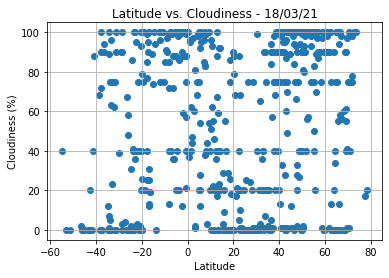

In [17]:
plt.scatter(lat, clo)
plt.title(f"Latitude vs. Cloudiness - {date}")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save plot
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

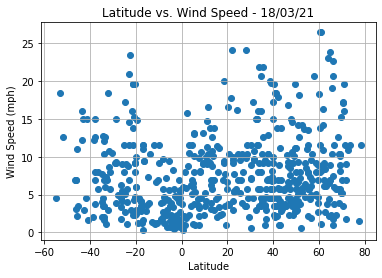

In [18]:
plt.scatter(lat, wsd)
plt.title(f"Latitude vs. Wind Speed - {date}")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save plot
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

def ln_regress(x, y, var_name, hemi):
    
    #Linear Regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_x = np.arange(x.min(), x.max())
    line_y = slope * line_x + intercept
        
    # Scatter Plot    
    plt.scatter(x, y)
    plt.grid(True)

    #Linear Regression Plot
    plt.plot(line_x, line_y, "r", label='$%.2fx + %.2f$, $R^2=%.2f$' % (slope, intercept, r_value**2) )
    plt.legend(loc='best')
    plt.title("Linear Regression: " + var_name + " vs Latitude" )
    plt.xlabel("Latitude")
    plt.ylabel(var_name)
    
    # Save plot
    plt.savefig("output_data/ln_regress_" + hemi + '_' + var_name + ".png")

In [20]:
# Create Northern and Southern Hemisphere DataFrames
north_df = cities_df.loc[(cities_df["Lat"] >= 0)]
south_df = cities_df.loc[(cities_df["Lat"] <  0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

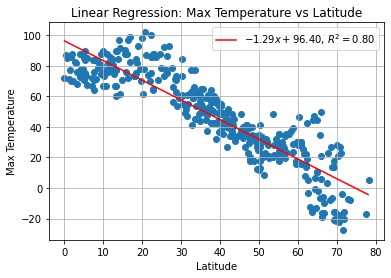

In [21]:
ln_regress(north_df["Lat"], north_df["MaxTemp"], "Max Temperature", 'Northern' )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

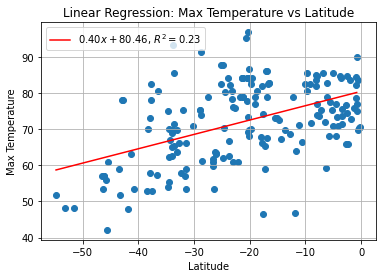

In [22]:
ln_regress(south_df["Lat"], south_df["MaxTemp"], "Max Temperature", 'Southern')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

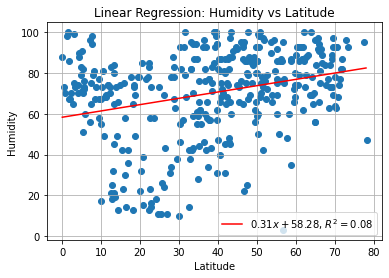

In [23]:
ln_regress(north_df["Lat"], north_df["Humidity"], "Humidity", 'Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

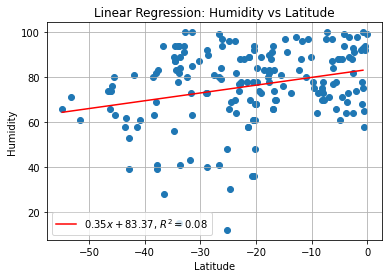

In [24]:
ln_regress(south_df["Lat"], south_df["Humidity"], "Humidity", 'Southern')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

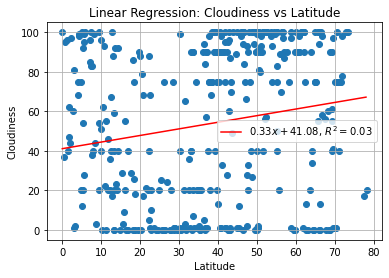

In [25]:
ln_regress(north_df["Lat"], north_df["Cloudiness"], "Cloudiness", 'Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

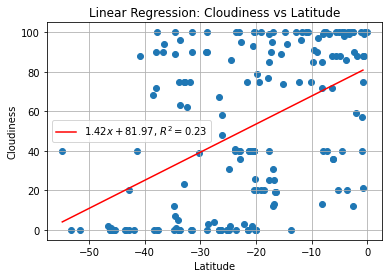

In [26]:
ln_regress(south_df["Lat"], south_df["Cloudiness"], "Cloudiness", 'Southern')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

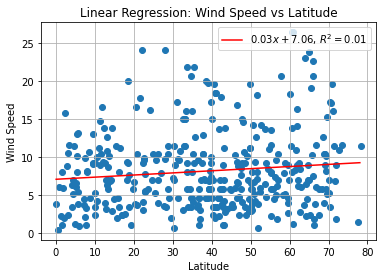

In [27]:
ln_regress(north_df["Lat"], north_df["WindSpeed"], "Wind Speed", 'Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

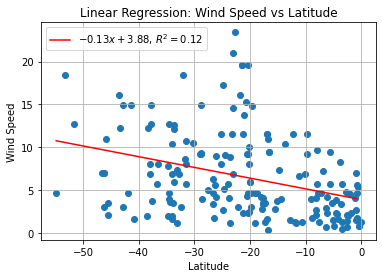

In [28]:
ln_regress(south_df["Lat"], south_df["WindSpeed"], "Wind Speed", 'Southern')